## Importing the libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

## Loading the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataset.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Define X by selecting only the age and EstimatedSalary, and y with purchased column

In [52]:
X = dataset.drop(['Purchased', 'Gender', 'User ID'], axis=1)
y = dataset['Purchased']

In [53]:
X.head()

Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
3   27            57000
4   19            76000

In [54]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

## Print count of each label in Purchased column

In [55]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

## Print Correlation of each feature in the dataset

In [56]:
dataset.corr()

User ID       Age  EstimatedSalary  Purchased
User ID          1.000000 -0.000721         0.071097   0.007120
Age             -0.000721  1.000000         0.155238   0.622454
EstimatedSalary  0.071097  0.155238         1.000000   0.362083
Purchased        0.007120  0.622454         0.362083   1.000000

# First: Logistic Regression model

## Split the dataset into Training set and Test set with test_size = 0.25 and random_state = 0

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)
X_train.head()

Age  EstimatedSalary
250   44            39000
63    32           120000
312   38            50000
159   32           135000
283   52            21000

## Train the model with random_state = 0

In [58]:
from sklearn.linear_model import LogisticRegression

lm_model = LogisticRegression(random_state=0)
lm_model.fit(X_train, y_train)

lm_model_prediction = lm_model.predict(X_test)


## Print the prediction results

In [59]:
print(accuracy_score(y_test,lm_model_prediction))

0.68


## Create dataframe with the Actual Purchased and Predict Purchased

In [60]:
df = pd.DataFrame(data=y_test)

In [61]:
df['Predict_Purchased'] = lm_model_prediction

In [62]:
(df['Purchased'] == df['Predict_Purchased']).value_counts()

True     68
False    32
dtype: int64

## Print Confusion Matrix and classification_report

In [63]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [64]:
print(classification_report(y_test,lm_model_prediction))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        68
           1       0.00      0.00      0.00        32

    accuracy                           0.68       100
   macro avg       0.34      0.50      0.40       100
weighted avg       0.46      0.68      0.55       100



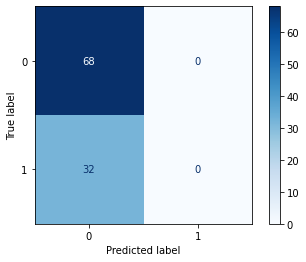

In [65]:
plot_confusion_matrix(lm_model, X_test, y_test, cmap='Blues')
plt.show()

## Use StandardScaler() to improved performance and re-train your model


In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_train)

In [68]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       189
           1       0.82      0.68      0.74       111

    accuracy                           0.82       300
   macro avg       0.82      0.79      0.80       300
weighted avg       0.82      0.82      0.82       300



## Try to Predicting a new result - e.g: person with Age = 30 and Salary = 90,000

In [69]:
model.predict([[30, 90000]])

array([1], dtype=int64)

## Try to Predicting a new result - e.g: person with Age = 40 and Salary = 90,000

In [70]:
model.predict([[40, 90000]])

array([1], dtype=int64)

# Second: k-nearest neighbors model

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [74]:
print(classification_report(y_test,lm_model_prediction))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        68
           1       0.00      0.00      0.00        32

    accuracy                           0.68       100
   macro avg       0.34      0.50      0.40       100
weighted avg       0.46      0.68      0.55       100

